## 0. Importing Modules

In [5]:
##### some basic modules
import os
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

##### Image-related modules
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import cv2 

##### keras module
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam


In [6]:
##### Import custom function

from unet_model import model
from data_preprocessing import rgb_lab_transformation, feature_label_generation, data_generation
from visualization import visualize_validation_image

## 1. Uploading and Preprocessing Dataset

##### Uploading

In [7]:
size_row = 128
size_col = 128

image_valid = plt.imread('directory') # insert name of directory where validation image is located

In [8]:
train_image, test_image, train_label, test_label = data_generation(dir_name = dir_name,
                                                                   image_size = (size_row, size_col))


1/173
2/173
3/173
4/173
5/173
6/173
7/173
8/173
9/173
10/173
11/173
12/173
13/173
14/173
15/173
16/173
17/173
18/173
19/173
20/173
21/173
22/173
23/173
24/173
25/173
26/173
27/173
28/173
29/173
30/173
31/173
32/173
33/173
34/173
35/173
36/173
37/173
38/173
39/173
40/173
41/173
42/173
43/173
44/173
45/173
46/173
47/173
48/173
49/173
50/173
51/173
52/173
53/173
54/173
55/173
56/173
57/173
58/173
59/173
60/173
61/173
62/173
63/173
64/173
65/173
66/173
67/173
68/173
69/173
70/173
71/173
72/173
73/173
74/173
75/173
76/173
77/173
78/173
79/173
80/173
81/173
82/173
83/173
84/173
85/173
86/173
87/173
88/173
89/173
90/173
91/173
92/173
93/173
94/173
95/173
96/173
97/173
98/173
99/173
100/173
101/173
102/173
103/173
104/173
105/173
106/173
107/173
108/173
109/173
110/173
111/173
112/173
113/173
114/173
115/173
116/173
117/173
118/173
119/173
120/173
121/173
122/173
123/173
124/173
125/173
126/173
127/173
128/173
129/173
130/173
131/173
132/173
133/173
134/173
135/173
136/173
137/173
138/173
139/

In [9]:
train_feature = train_image.reshape(train_image.shape[0], size_row, size_col, 1) 
test_feature = test_image.reshape(test_image.shape[0], size_row, size_col, 1)

x_feature = np.concatenate([train_feature, test_feature])
x_label = np.concatenate([train_label, test_label])

## 2. Defining and Fitting the Model

##### Define the model

In [10]:
input_shape = (size_row,size_col,1)
kernel_size = 4

In [11]:
K.clear_session()

In [12]:
model = model(image_size = input_shape[:2], kernel_size = kernel_size, optimizer = Adam(0.0002, 0.5))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 4)  40          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 4)  148         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 4)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

##### Fitting

In [13]:
image_valid = plt.imread('directory') # insert name of directory where validation image is located
image_valid = cv2.resize(image_valid, (size_row, size_col))

img_gray = rgb2gray(image_valid).reshape(128, 128, 1)
img_gray3 = np.concatenate([img_gray]*3, axis = 2) # concatenating three gray images so that it can have 3 channels
img_lab3 = rgb2lab(img_gray3) # convert concatenated image to lab

In [14]:
model_loss = []
img_colorized = []

In [15]:
epochs = 100
save_interval = int(epochs/20) # later, going to visualize training process with 20 images  

In [16]:
for i in range(epochs):

    model_hist = model.fit(x=x_feature, 
                           y=x_label, 
                           batch_size= 1, 
                           epochs=1,
                           verbose = 0)
    
    model_loss.append(model_hist.history['loss'])
    
    if i % save_interval == 0:
        
        print(i, model_hist.history['loss'])
        
        valid_input = img_lab3[:,:,0].reshape(1, size_row, size_col, 1)/128
        
        pred = model.predict(valid_input)    
        pred = pred.reshape(size_row, size_col, 2)
        
        cur_pred = np.zeros((size_row, size_col, 3))             
        # Output colorizations
        cur_pred[:,:,0] = valid_input.reshape(size_row, size_col) * 128 # lab class
        cur_pred[:,:,1:] = pred*128 # lab predicted
        
        img_colorized.append(lab2rgb(cur_pred))        

0 [0.019459829750749072]
5 [0.017261918416746326]
10 [0.01274439425232367]
15 [0.010699948907611783]
20 [0.009582404928178126]
25 [0.008457842243524579]
30 [0.007482124050389514]
35 [0.006868954574244457]


/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 3 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


40 [0.006459415302352851]


/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


45 [0.006124768883184743]
50 [0.005884813889970301]


/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 12 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


55 [0.005664568346294201]
60 [0.005504642675983722]
65 [0.005370117620593359]
70 [0.005252298587359725]
75 [0.005146669018729157]
80 [0.0050585005225000715]
85 [0.004971185435867741]
90 [0.004895506095065581]
95 [0.004835148130241223]


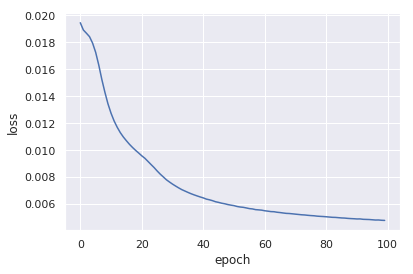

In [17]:
##### Plot loss function

plt.plot(model_loss)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

##### Visualization

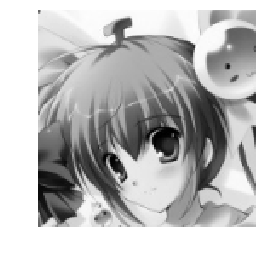

In [18]:
input_val = img_gray.copy()
plt.imshow(input_val.reshape(size_row, size_col), cmap = 'gray')
plt.axis('off')
plt.show()

In [19]:
grid_row = 4
grid_col = 5

In [20]:
g_row = []
i = 0

for r in range(grid_row):
    
    g_column = []
    
    for c in range(grid_col):
        g_column.append(img_colorized[i])
        i += 1
        
    g_column = np.concatenate(g_column, axis = 1)
    g_row.append(g_column)

g_row = np.concatenate(g_row)

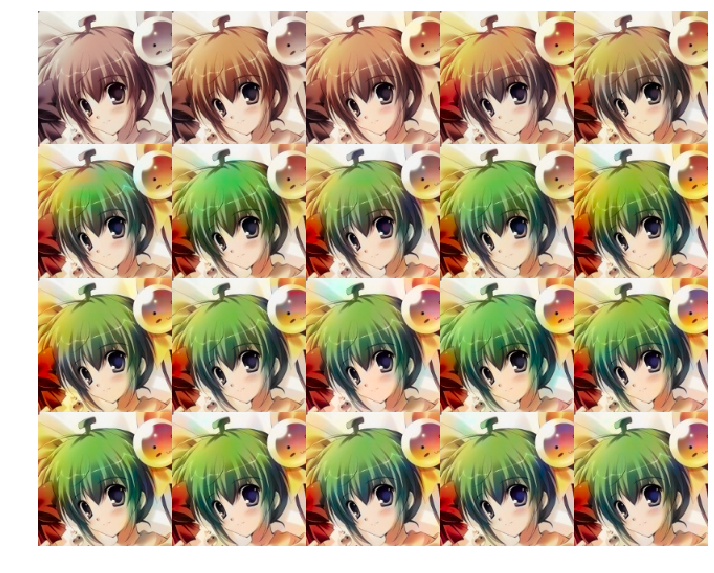

In [21]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(g_row)

##### Test with different image (same character)

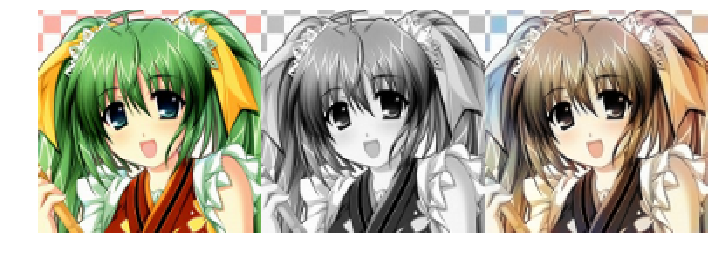

In [22]:
image_valid = plt.imread('directory') # insert name of directory where validation image is located
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))

##### Test with Different Character

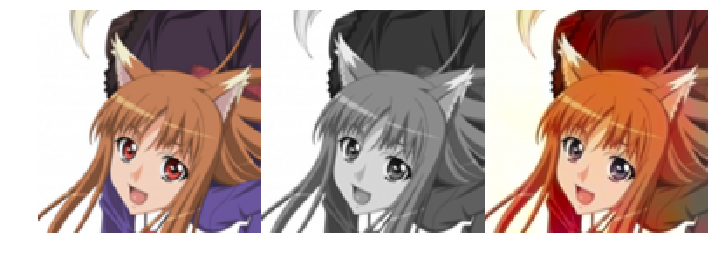

In [24]:
image_valid = plt.imread('directory') # insert name of directory where validation image is located
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))